### Objective
The objective of this project is to develop a machine learning classification model that can predict whether a playlist is productive or not productive based on its musical and metadata features. The model will leverage attributes such as track-level audio characteristics (e.g., tempo, energy, valence, danceability), textual metadata (e.g., track name, album name, artist), and playlist-level aggregated statistics to identify patterns that distinguish productive playlists from non-productive ones.

The overarching goal is to provide a reliable system that can assist users in automatically evaluating and recommending playlists that are conducive to focus, studying, or work. The model’s success will be measured in terms of classification accuracy, precision, recall, and F1-score, with emphasis on building a generalizable solution that performs well on unseen playlists.

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv('dataset.csv')

In [39]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head(3))
df.info()

Shape: (113999, 20)
Columns: ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [40]:
# Missing + duplicates
print("\nMissing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())


Missing values:
 track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
Duplicates: 450


In [41]:
# Drop exact duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Check missing values
print(df.duplicated().sum())


0


In [42]:
# Numeric summary
display(df.describe())

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


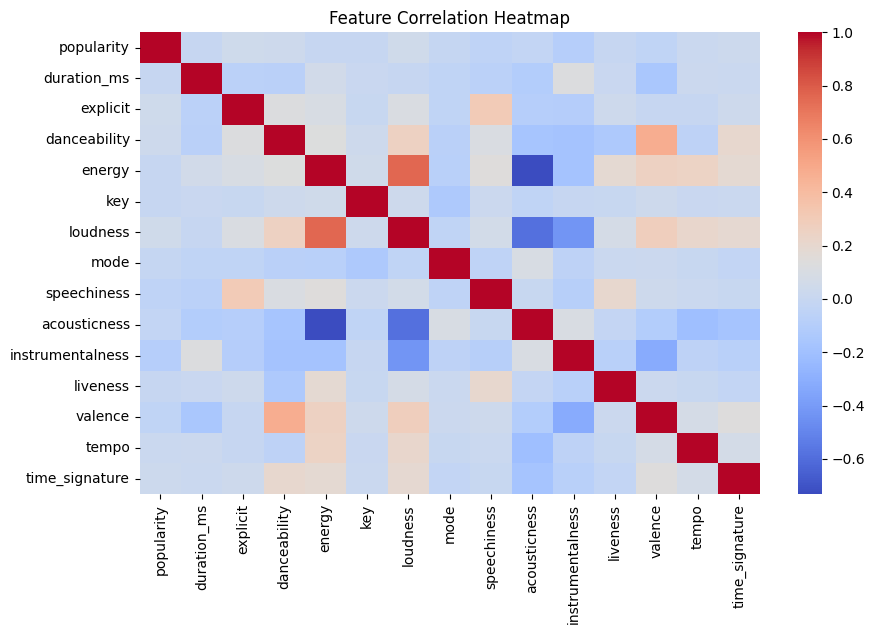

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

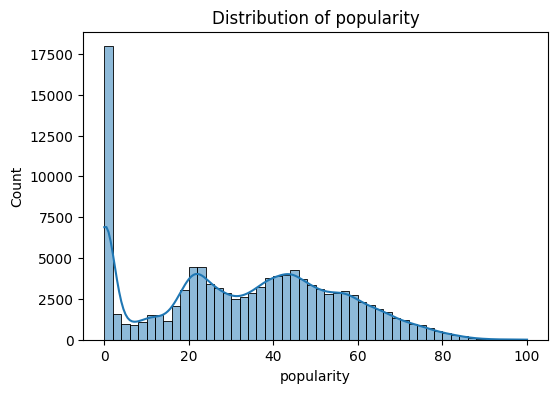

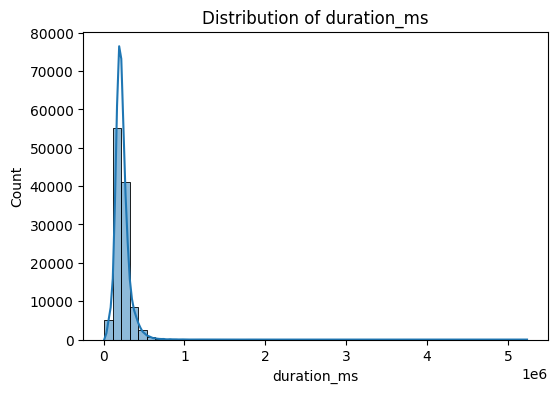

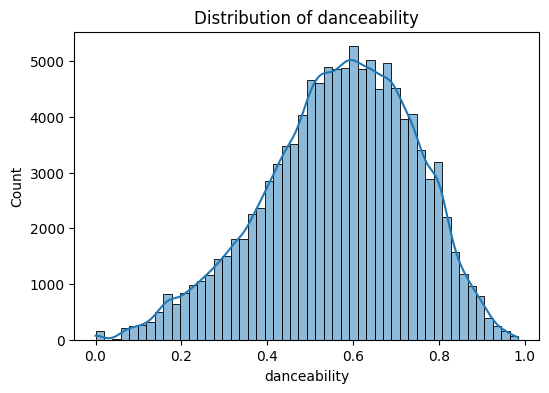

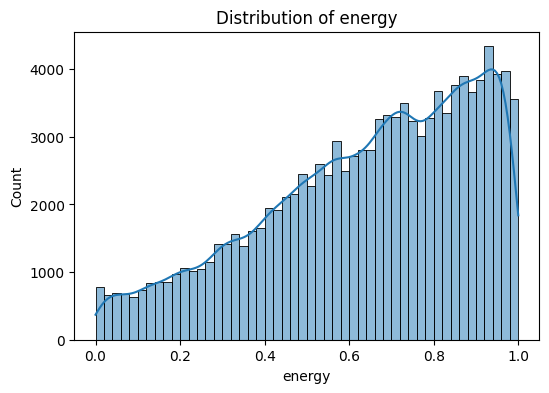

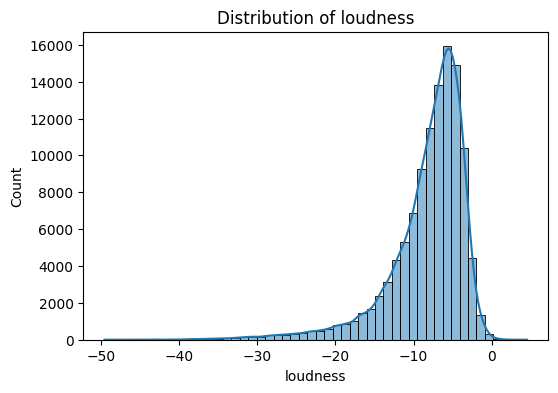

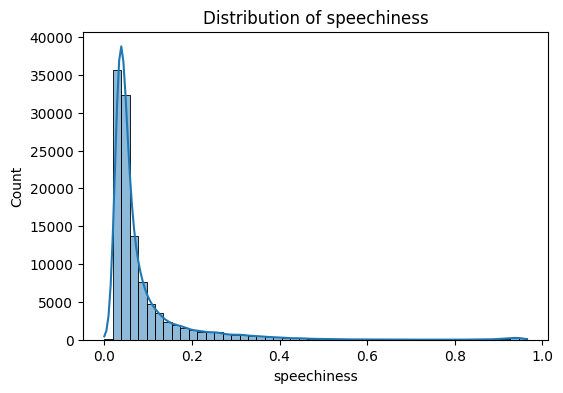

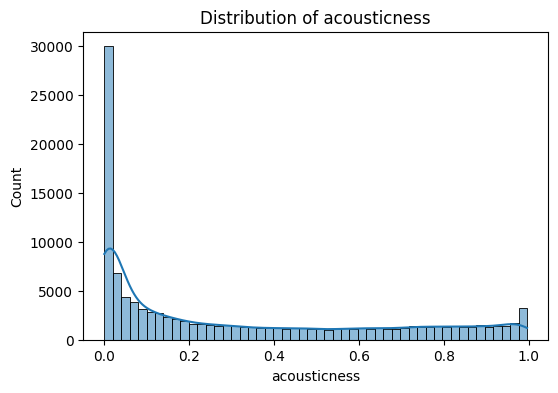

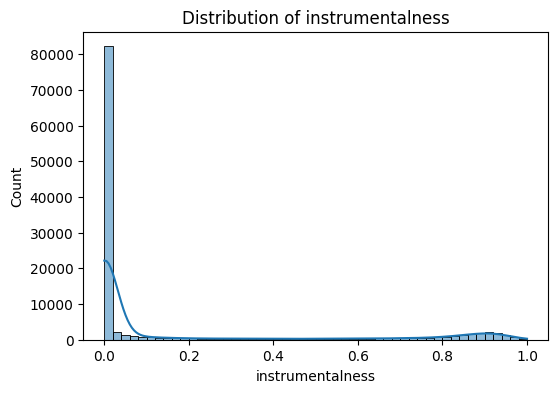

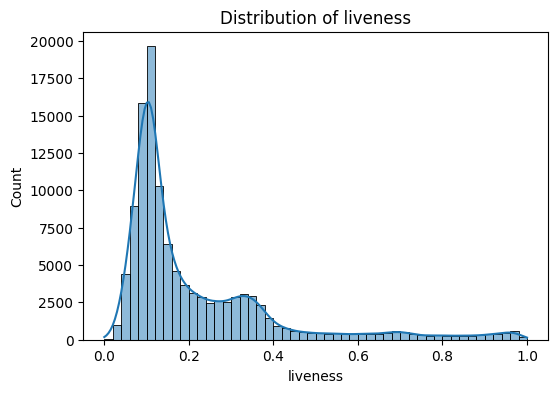

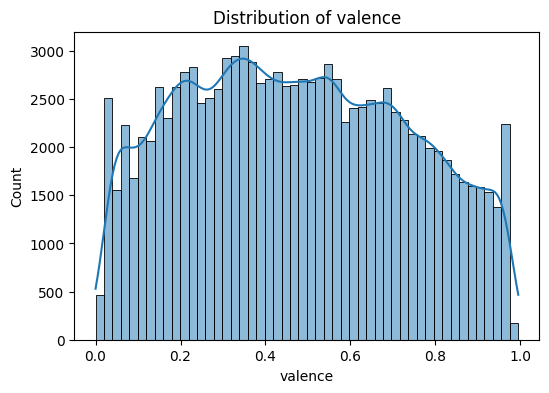

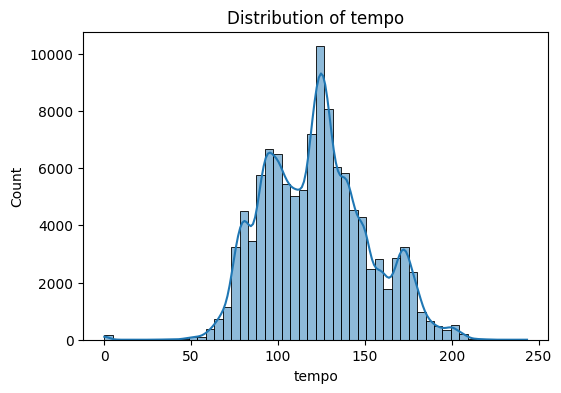

duration_ms         10.814577
speechiness          4.644570
liveness             2.105478
instrumentalness     1.737770
acousticness         0.730220
tempo                0.231604
valence              0.114774
popularity           0.042229
danceability        -0.400404
energy              -0.598550
loudness            -2.013340
dtype: float64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
num_cols = ['popularity','duration_ms','danceability','energy',
            'loudness','speechiness','acousticness','instrumentalness',
            'liveness','valence','tempo']

# Plot histograms with KDE
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Quick skewness check
df[num_cols].skew().sort_values(ascending=False)


In [45]:
num_cols = ['popularity','duration_ms','danceability','energy',
            'loudness','speechiness','acousticness','instrumentalness',
            'liveness','valence','tempo']

# Save a copy of original numeric columns
df_raw = df[num_cols].copy()


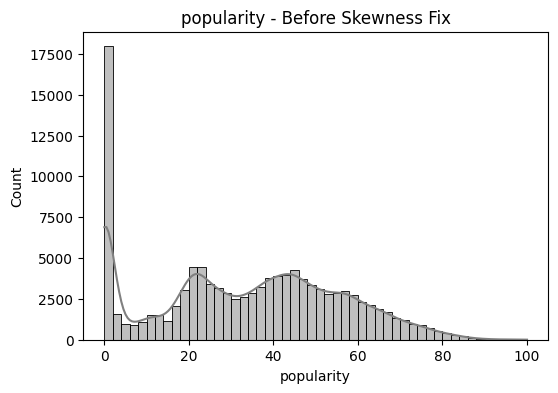

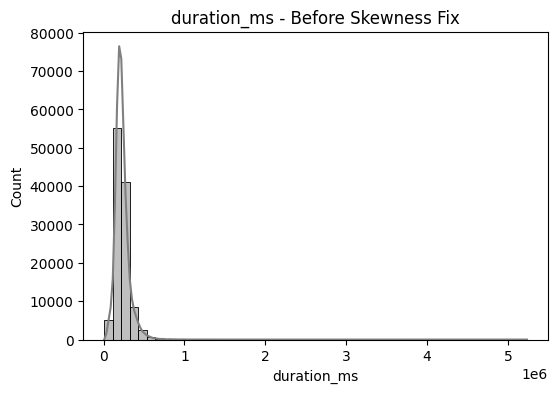

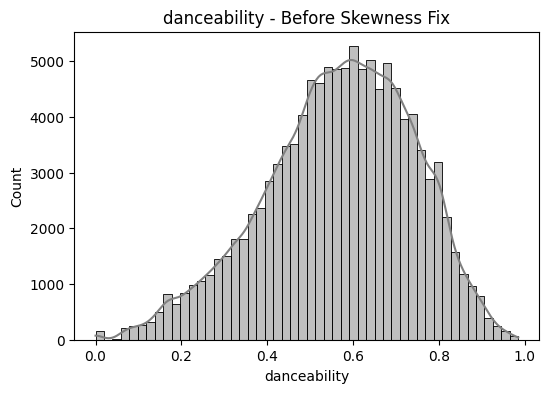

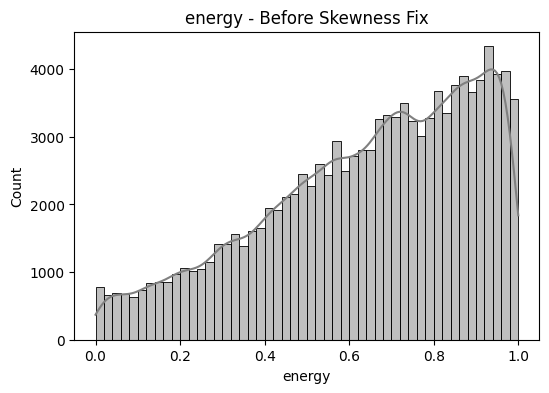

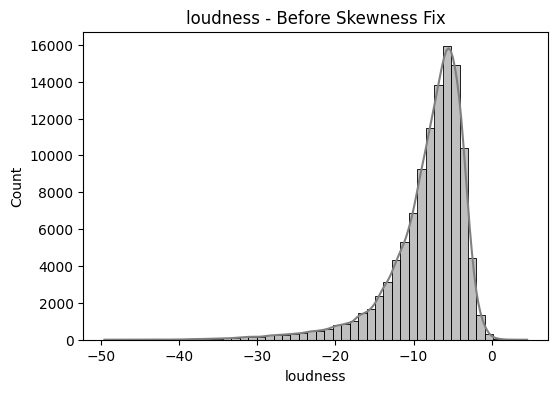

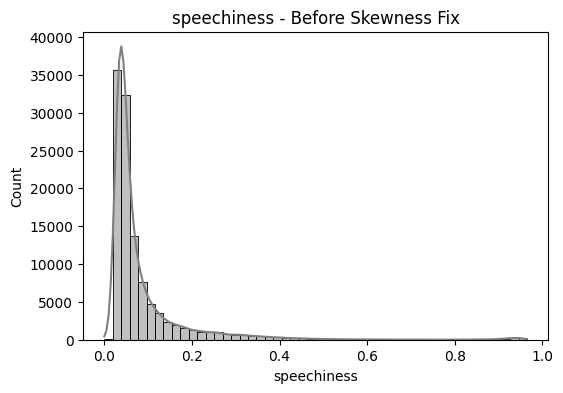

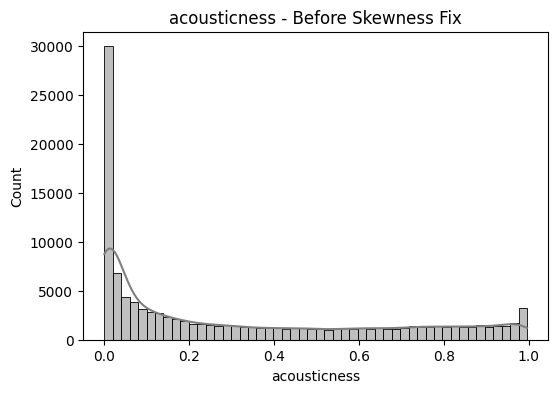

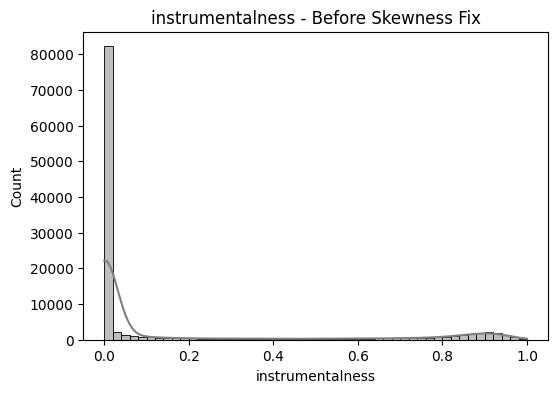

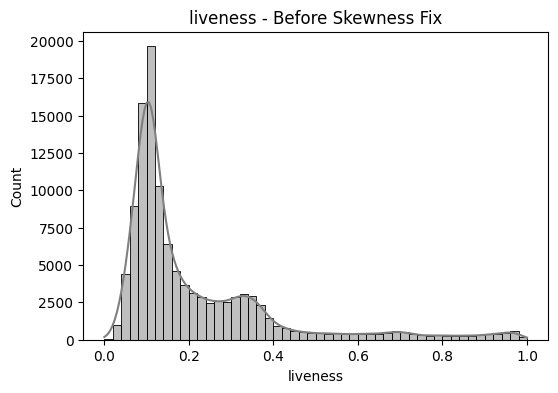

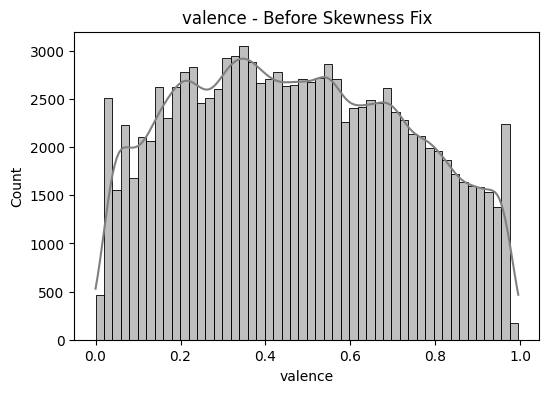

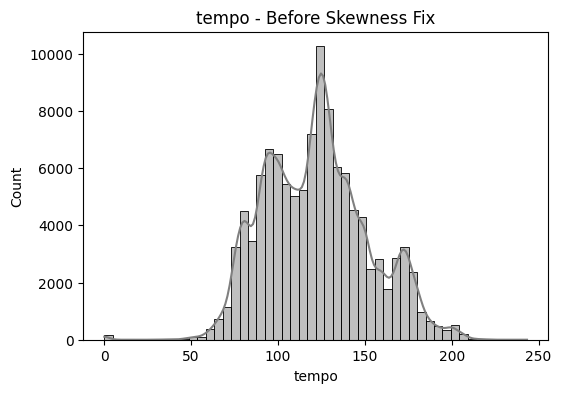

In [46]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_raw[col], bins=50, kde=True, color="gray")
    plt.title(f"{col} - Before Skewness Fix")
    plt.show()


Transforming the highly skewed columns

In [47]:
# Log for highly skewed duration,spechiness, liveness, instrumentalness
log_cols=['duration_ms','speechiness','liveness','instrumentalness']

for col in log_cols:
    df[col]=np.log1p(df[col])


Scaling the columns

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

X_scaled=scaler.fit_transform(df[num_cols])
X_scaled=pd.DataFrame(X_scaled,columns=num_cols)

display(X_scaled.head())

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.780470,0.220962,0.628394,-0.721328,0.298800,0.681490,-0.849230,-0.517925,0.886884,0.928984,-1.142994
1,0.972707,-0.916420,-0.847891,-1.896382,-1.794228,-0.048194,1.837684,-0.517905,-0.628200,-0.799395,-1.490909
2,1.062459,-0.015315,-0.744089,-1.127618,-0.297440,-0.282719,-0.313535,-0.517930,-0.524007,-1.366520,-1.529510
3,1.690719,-0.128536,-1.735968,-2.320198,-2.049645,-0.507804,1.780439,-0.517615,-0.427672,-1.277786,1.987275
4,2.184352,-0.168915,0.293923,-0.793026,-0.286864,-0.318407,0.466809,-0.517930,-0.747909,-1.185194,-0.074292


Before and After

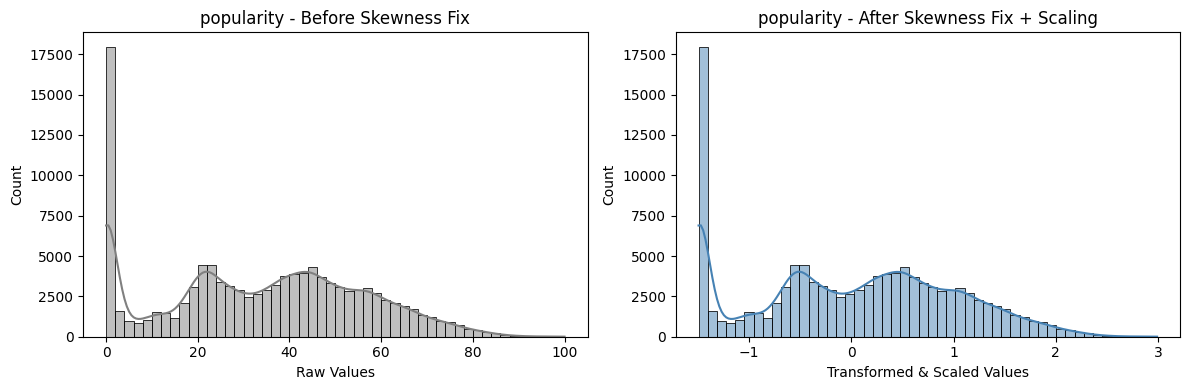

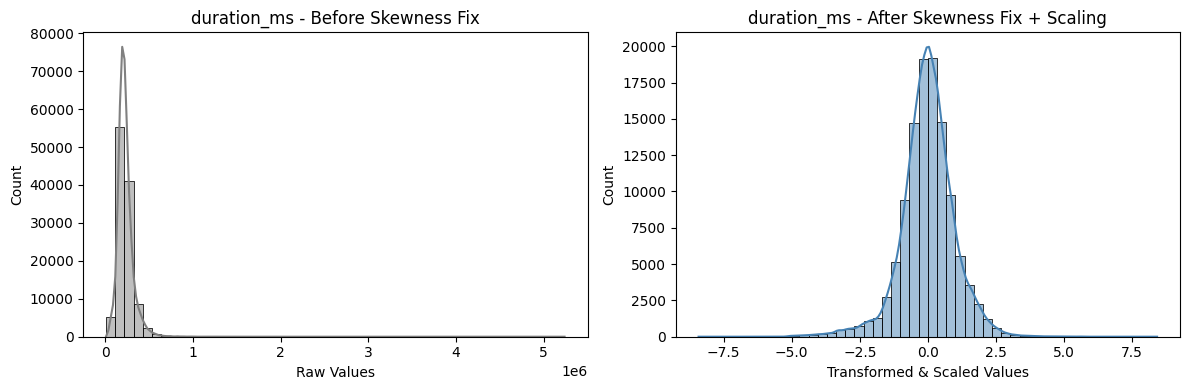

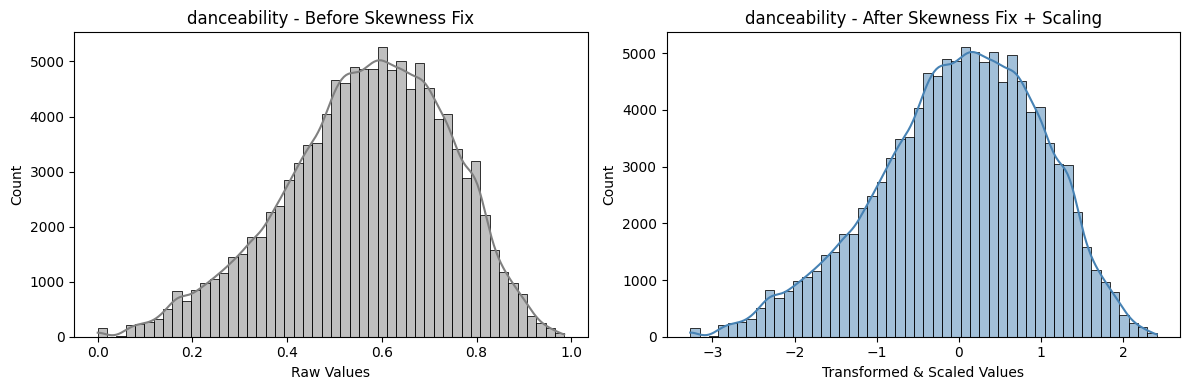

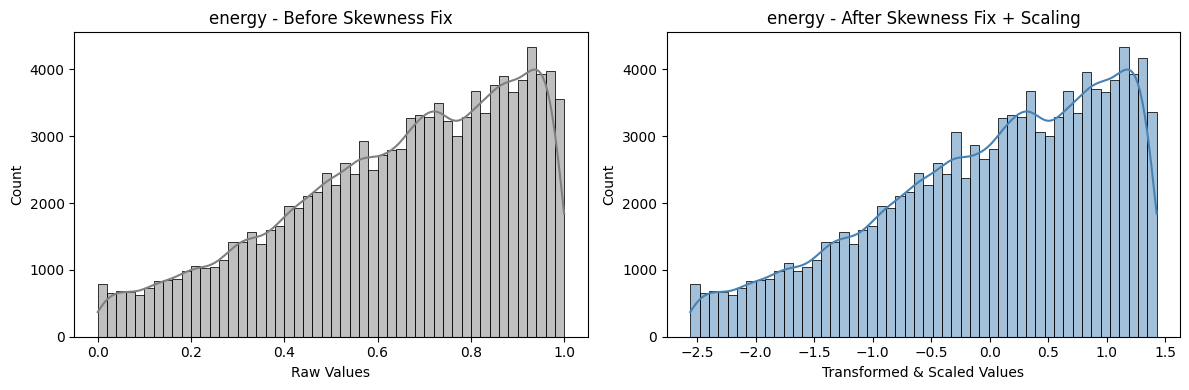

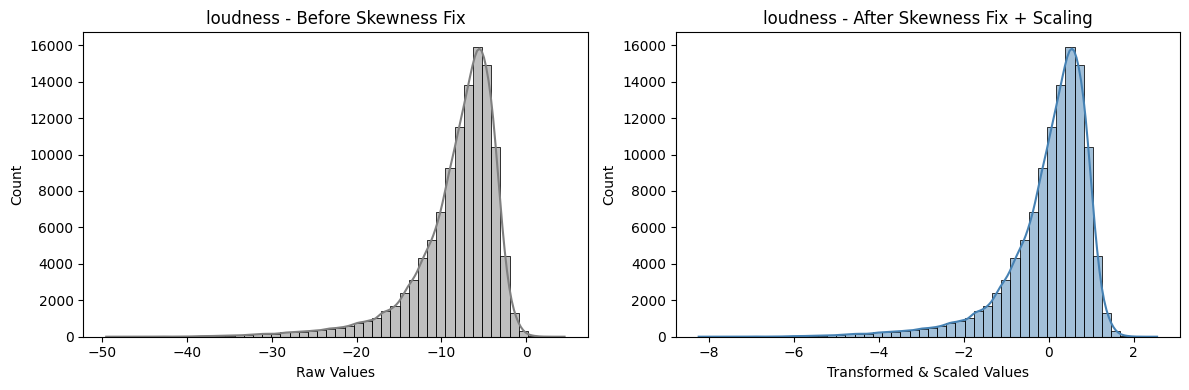

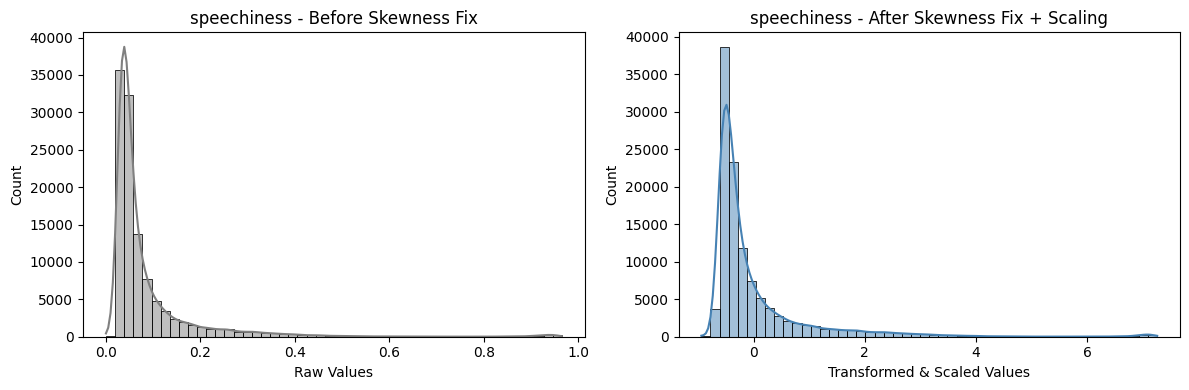

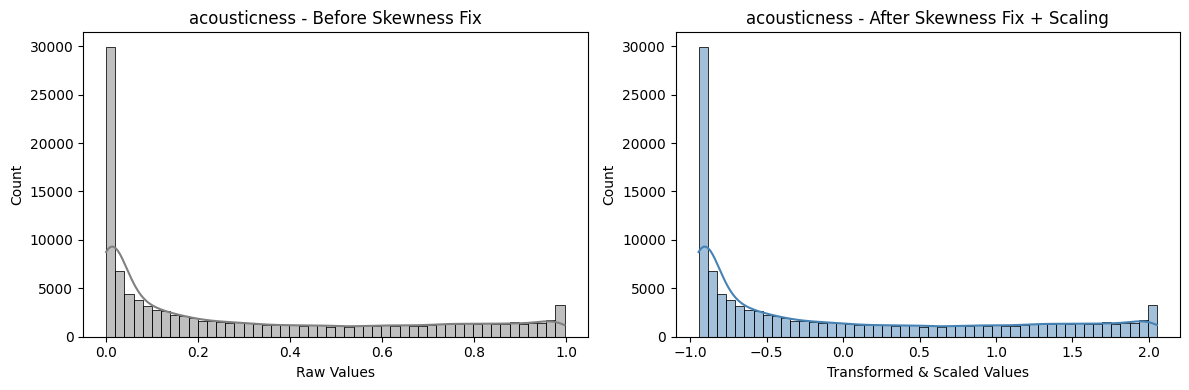

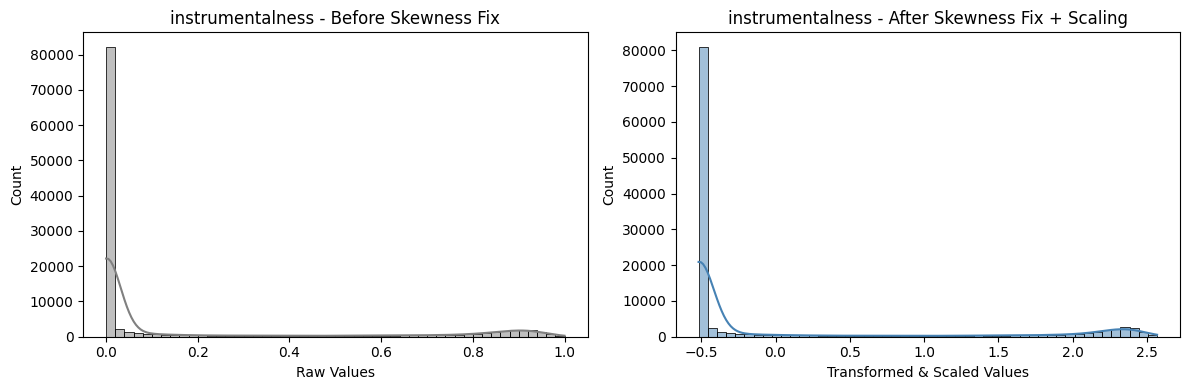

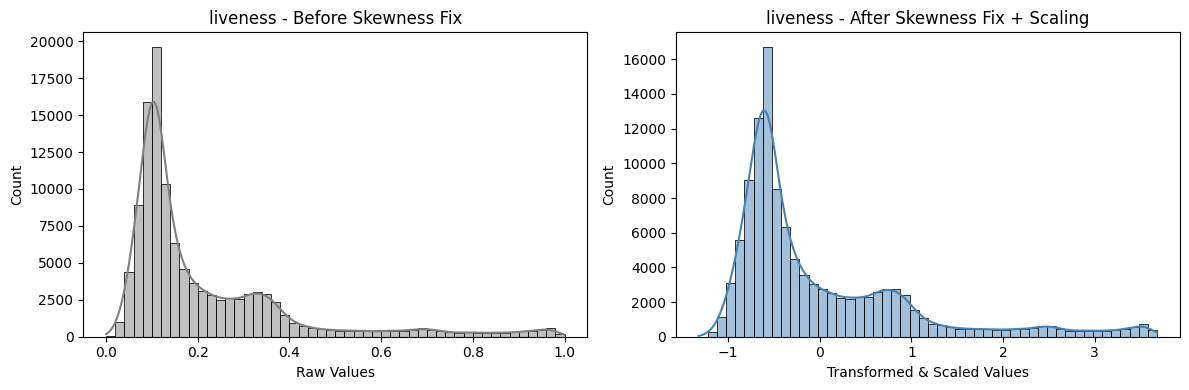

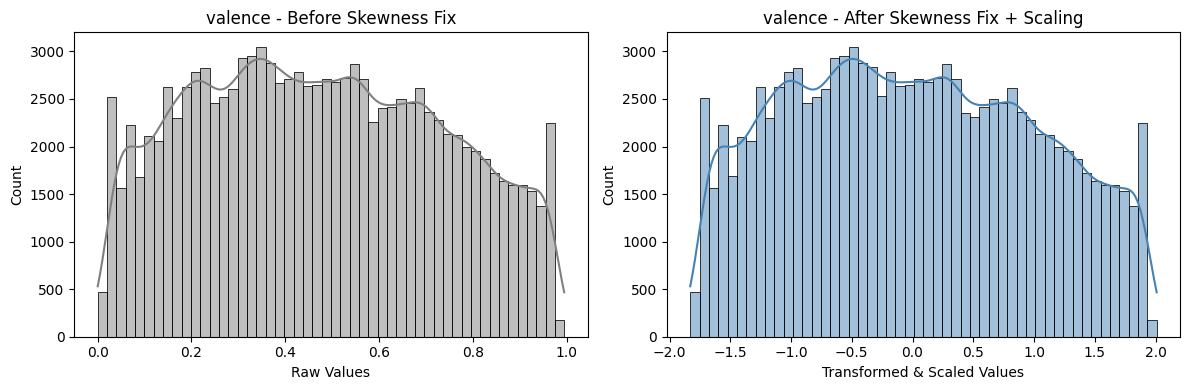

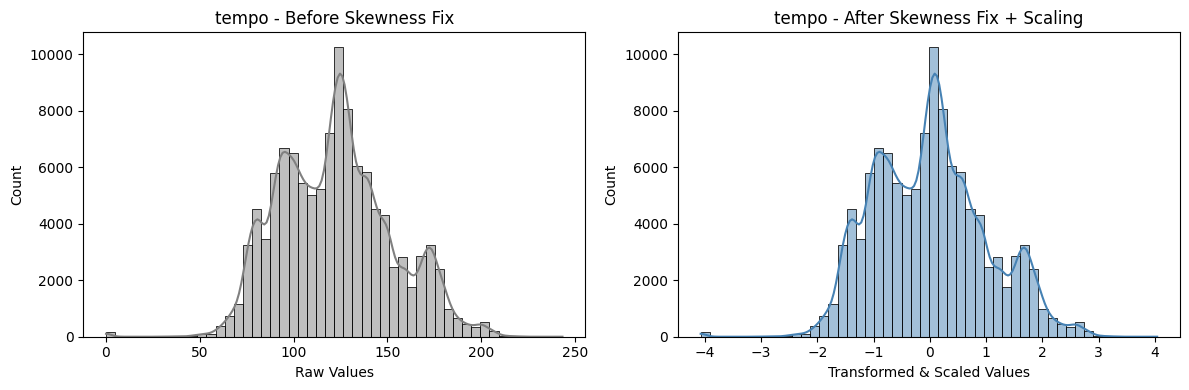

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['popularity','duration_ms','danceability','energy',
            'loudness','speechiness','acousticness','instrumentalness',
            'liveness','valence','tempo']

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    
    # Before preprocessing (raw values)
    sns.histplot(df_raw[col], bins=50, kde=True, ax=axes[0], color="gray")
    axes[0].set_title(f"{col} - Before Skewness Fix")
    axes[0].set_xlabel("Raw Values")
    
    # After preprocessing (log + scaled)
    sns.histplot(X_scaled[col], bins=50, kde=True, ax=axes[1], color="steelblue")
    axes[1].set_title(f"{col} - After Skewness Fix + Scaling")
    axes[1].set_xlabel("Transformed & Scaled Values")
    
    plt.tight_layout()
    plt.show()


Clustering the Data to get labelled data (Productive or not) 

In [51]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [52]:
X=X_scaled.values

sample_frac=0.25
rng=np.random.default_rng(42)
sample_idx=rng.choice(X.shape[0],size=int(X.shape[0]*sample_frac),replace=False)
X_sample=X[sample_idx]
Ks=list(range(2,13))


In [53]:
inertia=[]
sil_scores=[]

for k in Ks:
    km=KMeans(n_clusters=k,random_state=42,n_init=10)
    labels=km.fit_predict(X_sample)
    
    inertia.append(km.inertia_)
    sil=silhouette_score(X_sample,labels)
    sil_scores.append(sil)
    print(f"k={k:2d}   inertia={km.inertia_:,.0f}   silhouette={sil:.4f}")

k= 2   inertia=257,780   silhouette=0.2242
k= 3   inertia=234,122   silhouette=0.1282
k= 4   inertia=217,553   silhouette=0.1334
k= 5   inertia=201,665   silhouette=0.1347
k= 6   inertia=188,059   silhouette=0.1400
k= 7   inertia=177,464   silhouette=0.1430
k= 8   inertia=168,234   silhouette=0.1370
k= 9   inertia=162,530   silhouette=0.1395
k=10   inertia=157,158   silhouette=0.1369
k=11   inertia=152,438   silhouette=0.1270
k=12   inertia=148,380   silhouette=0.1314


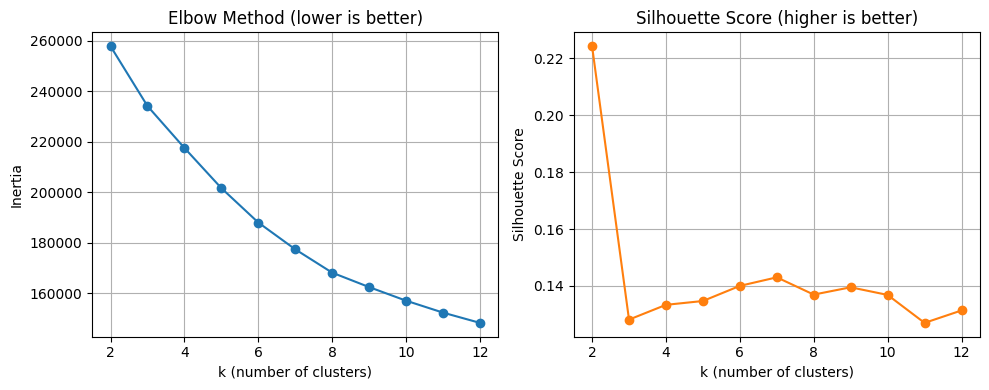

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(Ks, inertia, marker='o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.title('Elbow Method (lower is better)')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(Ks, sil_scores, marker='o', color='C1')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (higher is better)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [55]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [56]:
df['playlist_cluster'] = clusters
# Only aggregate numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('playlist_cluster')[numeric_cols].mean()
cluster_summary

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_cluster
playlist_cluster,,,,,,,,,,,,,,,
0,31.355038,12.178372,0.472662,0.304171,5.046566,-14.129986,0.701510,0.054891,0.746790,0.216652,0.157338,0.322470,110.025056,3.753593,0.0
1,33.955394,12.292256,0.597266,0.750355,5.393677,-6.357447,0.617475,0.084744,0.175425,0.084162,0.191494,0.522819,126.068622,3.952475,1.0


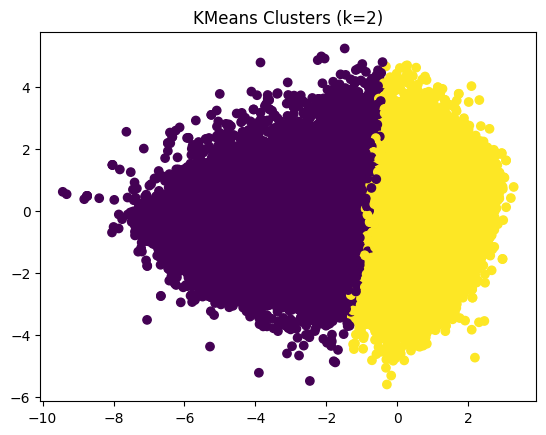

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.title('KMeans Clusters (k=2)')
plt.show()

In [58]:
df['productivity'] = df['playlist_cluster'].map({0: 'Non-Productive', 1: 'Productive'})


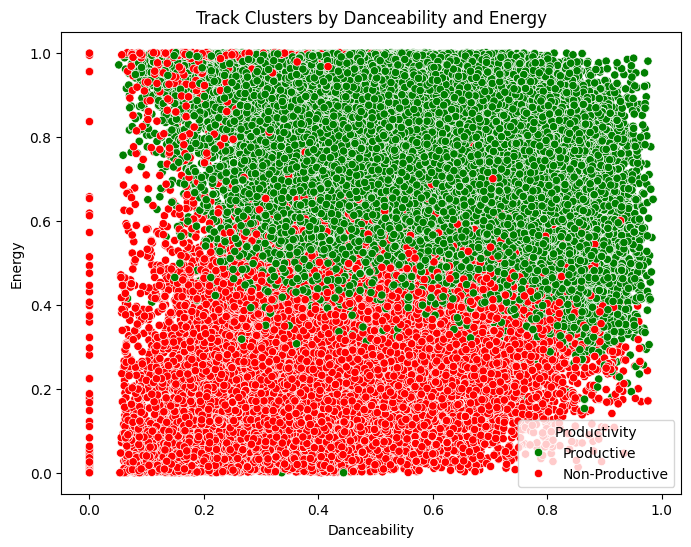

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='danceability', 
    y='energy', 
    hue='productivity', 
    palette={'Non-Productive':'red', 'Productive':'green'}
)
plt.title('Track Clusters by Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Productivity')
plt.show()

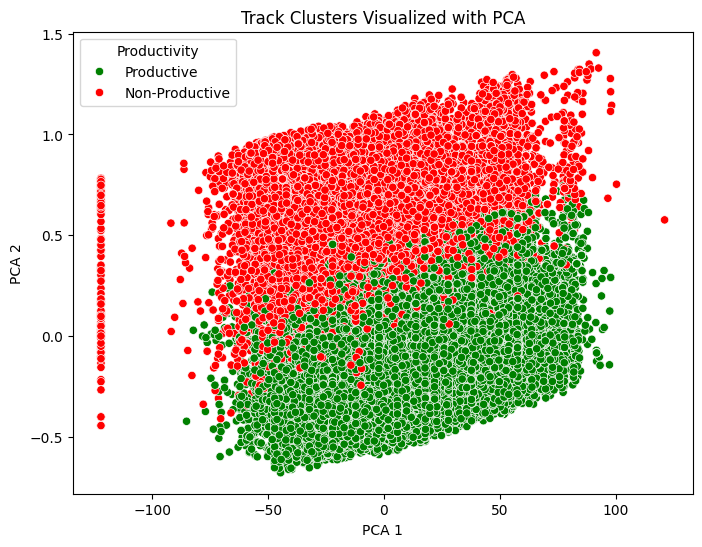

In [60]:
features = ['danceability', 'energy', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])

df['pca1'] = pca_result[:,0]
df['pca2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='pca1',
    y='pca2',
    hue='productivity',
    palette={'Non-Productive':'red', 'Productive':'green'}
)
plt.title('Track Clusters Visualized with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Productivity')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_23052\1327661603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


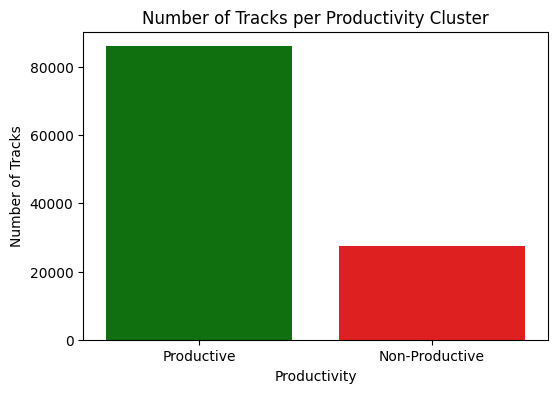

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x='productivity',
    palette={'Non-Productive':'red', 'Productive':'green'}
)
plt.title('Number of Tracks per Productivity Cluster')
plt.xlabel('Productivity')
plt.ylabel('Number of Tracks')
plt.show()

In [62]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre,playlist_cluster,productivity,pca1,pca2
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,12.348730,False,0.676,0.4610,1,...,0.000001,0.306013,0.715,87.917,4,acoustic,1,Productive,-34.258119,-0.322436
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,11.915794,False,0.420,0.1660,1,...,0.000006,0.096219,0.267,77.489,4,acoustic,0,Non-Productive,-44.688961,0.650261
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,12.258793,False,0.438,0.3590,0,...,0.000000,0.110647,0.120,76.332,4,acoustic,0,Non-Productive,-45.844019,0.023102
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,12.215696,False,0.266,0.0596,0,...,0.000071,0.123986,0.143,181.740,3,acoustic,0,Non-Productive,59.561287,1.067526
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,12.200326,False,0.618,0.4430,2,...,0.000000,0.079643,0.167,119.949,4,acoustic,0,Non-Productive,-2.227687,0.275141


In [63]:
X = df.drop(['playlist_cluster', 'productivity','track_id','artists','album_name','track_name','track_genre'], axis=1)
y = df['productivity']

In [64]:
X

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pca1,pca2
0,73,12.348730,False,0.676,0.4610,1,-6.746,0,0.133656,0.0322,0.000001,0.306013,0.7150,87.917,4,-34.258119,-0.322436
1,55,11.915794,False,0.420,0.1660,1,-17.235,1,0.073529,0.9240,0.000006,0.096219,0.2670,77.489,4,-44.688961,0.650261
2,57,12.258793,False,0.438,0.3590,0,-9.734,1,0.054204,0.2100,0.000000,0.110647,0.1200,76.332,4,-45.844019,0.023102
3,71,12.215696,False,0.266,0.0596,0,-18.515,1,0.035657,0.9050,0.000071,0.123986,0.1430,181.740,3,59.561287,1.067526
4,82,12.200326,False,0.618,0.4430,2,-9.681,1,0.051263,0.4690,0.000000,0.079643,0.1670,119.949,4,-2.227687,0.275141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,21,12.860999,False,0.172,0.2350,5,-16.393,1,0.041334,0.6400,0.656483,0.082777,0.0339,125.995,5,3.817270,0.737924
113545,22,12.861001,False,0.174,0.1170,0,-18.318,0,0.039317,0.9940,0.681075,0.099845,0.0350,85.239,4,-36.939588,0.952667
113546,22,12.511596,False,0.629,0.3290,0,-10.895,0,0.041142,0.8670,0.000000,0.080566,0.7430,132.378,4,10.200480,0.541282
113547,41,12.556356,False,0.587,0.5060,7,-10.889,1,0.029267,0.3810,0.000000,0.239017,0.4130,135.960,4,13.783739,0.161537


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [66]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

In [68]:
classification_report(y_test, y_pred)

'                precision    recall  f1-score   support\n\nNon-Productive       0.98      0.98      0.98      5510\n    Productive       0.99      0.99      0.99     17200\n\n      accuracy                           0.99     22710\n     macro avg       0.99      0.98      0.99     22710\n  weighted avg       0.99      0.99      0.99     22710\n'

In [69]:
confusion_matrix(y_test, y_pred)

array([[ 5373,   137],
       [  102, 17098]], dtype=int64)

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

In [71]:
scores

array([0.9769705 , 0.98150594, 0.98965214, 0.988155  , 0.98467568])

In [72]:
scores.mean()

0.9841918509527015

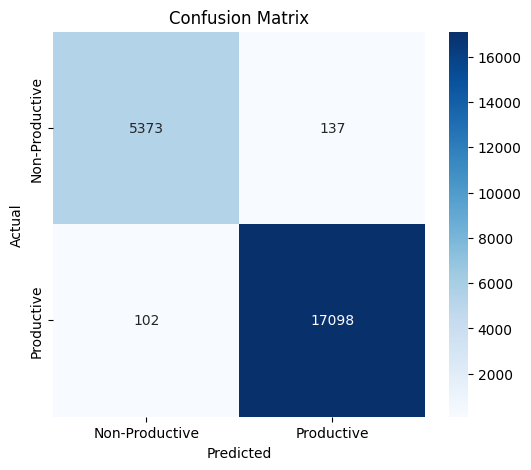

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ['Non-Productive', 'Productive']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


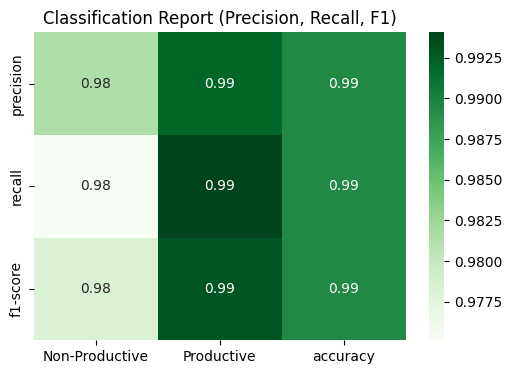

In [74]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :3]  # Drop 'accuracy' row

plt.figure(figsize=(6,4))
sns.heatmap(report_df, annot=True, cmap='Greens', fmt=".2f")
plt.title('Classification Report (Precision, Recall, F1)')
plt.show()


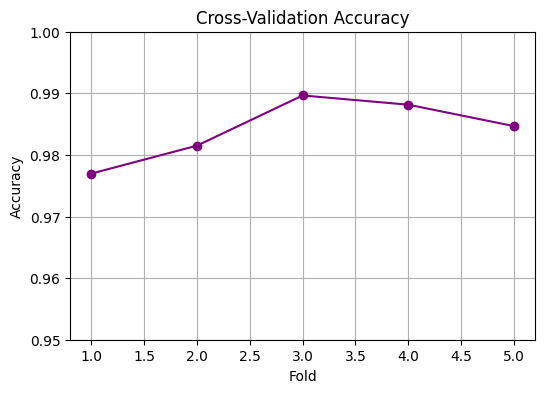

Mean CV Accuracy: 0.9842


In [75]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(6,4))
plt.plot(range(1, len(scores)+1), scores, marker='o', color='purple')
plt.ylim(0.95, 1.0)
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

print(f"Mean CV Accuracy: {scores.mean():.4f}")
